# Author : Samruddhi Randive
## Task 4 :  Exploratory Data Analysis - Terrorism
GRIP @ The Sparks Foundation
Problem Statement : To find out the hot zone of terrorism.

Technical Stack : Seaborn, Numpy Array, Scipy, Pandas, Matplotlib

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
terrorist_data = pd.read_csv("globalterrorismdb_0718dist.csv", sep=",", encoding="ISO-8859-1", header=0)
terrorist_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terrorist_data.shape

(181691, 135)

In [6]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [7]:
terrorist_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning

In [8]:
terrorist_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
Null_columns = ((terrorist_data.isnull().sum()/terrorist_data.shape[0]) * 100).round(2)
Null_columns

eventid        0.00
iyear          0.00
imonth         0.00
iday           0.00
approxdate    94.91
              ...  
INT_LOG        0.00
INT_IDEO       0.00
INT_MISC       0.00
INT_ANY        0.00
related       86.22
Length: 135, dtype: float64


**Looks like there are so many columns with null values. lets remove them**.

In [10]:
Null_columns_50 = Null_columns[Null_columns>50]
Null_columns_50

approxdate         94.91
resolution         98.78
location           69.46
alternative        84.03
alternative_txt    84.03
                   ...  
nreleased          94.28
addnotes           84.43
scite2             57.66
scite3             76.05
related            86.22
Length: 77, dtype: float64


### Lets drop these columns.

In [15]:
terrorist_data = terrorist_data.drop(Null_columns_50.index, axis=1)
terrorist_data.shape

(181691, 58)

In [16]:
Null_columns1 = ((terrorist_data.isnull().sum()/terrorist_data.shape[0]) * 100).round(2)


#### Lets check for nulls above 30%

In [17]:
Null_columns_30 = Null_columns1[Null_columns1>30]
Null_columns_30

summary       36.40
nperps        39.14
nperpcap      38.25
claimed       36.39
weapdetail    37.24
nkillus       35.47
nkillter      36.85
nwoundus      35.61
nwoundte      38.06
scite1        36.43
dtype: float64


In order to impute these null values lets check the data.

First lets drop the unwanted columns.

In [19]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [20]:
terrorist_data = terrorist_data.drop(["country", "region", "summary", "crit1", "crit2", "crit3", "attacktype1", "targtype1", "targsubtype1", "natlty1", "guncertain1", "nperps", "weaptype1", "weapsubtype1", "scite1", "ishostkid", "INT_LOG", "INT_IDEO", "INT_MISC", "INT_ANY", "weapdetail", "target1", "corp1"], axis=1)

In [21]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,dbsource
0,1.970000e+11,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,PGIS
1,1.970000e+11,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,...,Unknown,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,PGIS
2,1.970010e+11,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,...,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,PGIS
3,1.970010e+11,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,...,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,1,PGIS
4,1.970010e+11,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,...,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PGIS


In [22]:
terrorist_data.shape

(181691, 35)

In [23]:
((terrorist_data.isnull().sum()/terrorist_data.shape[0]) * 100).round(2)

eventid              0.00
iyear                0.00
imonth               0.00
iday                 0.00
extended             0.00
country_txt          0.00
region_txt           0.00
provstate            0.23
city                 0.24
latitude             2.51
longitude            2.51
specificity          0.00
vicinity             0.00
doubtterr            0.00
multiple             0.00
success              0.00
suicide              0.00
attacktype1_txt      0.00
targtype1_txt        0.00
targsubtype1_txt     5.71
natlty1_txt          0.86
gname                0.00
individual           0.00
nperpcap            38.25
claimed             36.39
weaptype1_txt        0.00
weapsubtype1_txt    11.43
nkill                5.68
nkillus             35.47
nkillter            36.85
nwound               8.98
nwoundus            35.61
nwoundte            38.06
property             0.00
dbsource             0.00
dtype: float64

In [24]:
terrorist_data.weapsubtype1_txt.value_counts()

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792
Pipe Bomb                      

We will fill the column "Weaponsubtype" with mode "Unknown".

In [26]:
terrorist_data["weapsubtype1_txt"] = terrorist_data["weapsubtype1_txt"].fillna("Unknown Explosive Type")

**Similarly lets check for remaining variables also.**

In [28]:
terrorist_data.dropna(subset = ["nkill", "nkillus", "nkillter", "nwound", "nwoundus", "nwoundte", "nperpcap", "natlty1_txt", "city", "latitude", "longitude"], inplace = True)

In [29]:
((terrorist_data.isnull().sum()/terrorist_data.shape[0]) * 100).round(2)

eventid             0.00
iyear               0.00
imonth              0.00
iday                0.00
extended            0.00
country_txt         0.00
region_txt          0.00
provstate           0.01
city                0.00
latitude            0.00
longitude           0.00
specificity         0.00
vicinity            0.00
doubtterr           0.00
multiple            0.00
success             0.00
suicide             0.00
attacktype1_txt     0.00
targtype1_txt       0.00
targsubtype1_txt    5.55
natlty1_txt         0.00
gname               0.00
individual          0.00
nperpcap            0.00
claimed             0.00
weaptype1_txt       0.00
weapsubtype1_txt    0.00
nkill               0.00
nkillus             0.00
nkillter            0.00
nwound              0.00
nwoundus            0.00
nwoundte            0.00
property            0.00
dbsource            0.00
dtype: float64

In [30]:
terrorist_data.targsubtype1_txt.value_counts()

Unnamed Civilian/Unspecified                               8620
Police Security Forces/Officers                            6714
Military Personnel (soldiers, troops, officers, forces)    5272
Government Personnel (excluding police, military)          4284
Police Patrol (including vehicles and convoys)             3590
                                                           ... 
Personnel                                                    12
Internet Infrastructure                                      10
Royalty                                                      10
Oil Tanker                                                    6
Tourism Travel Agency                                         1
Name: targsubtype1_txt, Length: 112, dtype: int64

In [31]:
terrorist_data["targsubtype1_txt"] = terrorist_data["targsubtype1_txt"].fillna("Unnamed Civilian/Unspecified")

In [32]:

((terrorist_data.isnull().sum()/terrorist_data.shape[0]) * 100).round(2)

eventid             0.00
iyear               0.00
imonth              0.00
iday                0.00
extended            0.00
country_txt         0.00
region_txt          0.00
provstate           0.01
city                0.00
latitude            0.00
longitude           0.00
specificity         0.00
vicinity            0.00
doubtterr           0.00
multiple            0.00
success             0.00
suicide             0.00
attacktype1_txt     0.00
targtype1_txt       0.00
targsubtype1_txt    0.00
natlty1_txt         0.00
gname               0.00
individual          0.00
nperpcap            0.00
claimed             0.00
weaptype1_txt       0.00
weapsubtype1_txt    0.00
nkill               0.00
nkillus             0.00
nkillter            0.00
nwound              0.00
nwoundus            0.00
nwoundte            0.00
property            0.00
dbsource            0.00
dtype: float64

In [33]:

terrorist_data.shape

(100048, 35)

In [34]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,dbsource
5,1.970010e+11,1970,1,1,0,United States,North America,Illinois,Cairo,37.005105,...,Firearms,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
7,1.970010e+11,1970,1,2,0,United States,North America,California,Oakland,37.791927,...,Explosives,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
8,1.970010e+11,1970,1,2,0,United States,North America,Wisconsin,Madison,43.076592,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
9,1.970010e+11,1970,1,3,0,United States,North America,Wisconsin,Madison,43.072950,...,Incendiary,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
11,1.970010e+11,1970,1,6,0,United States,North America,Colorado,Denver,39.758968,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project


**We have dealed with Nullvalues lets do EDA on the data.**


### Exploratory Data Analysis

**Univariant Analysis**

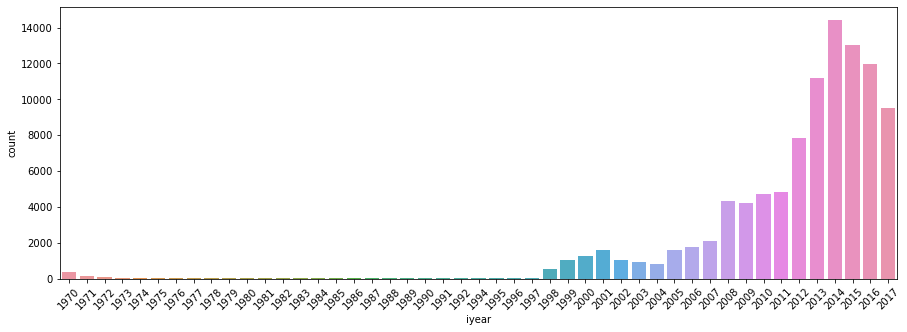

In [35]:

plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.iyear)
plt.xticks(rotation=45)
plt.show()

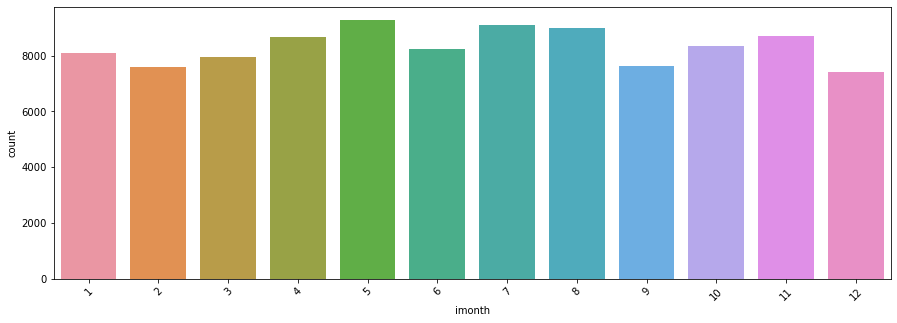

In [36]:

plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.imonth)
plt.xticks(rotation=45)
plt.show()

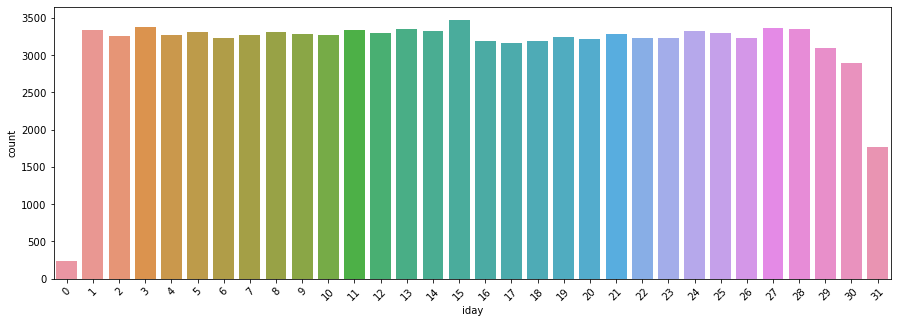

In [37]:
plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.iday)
plt.xticks(rotation=45)
plt.show()

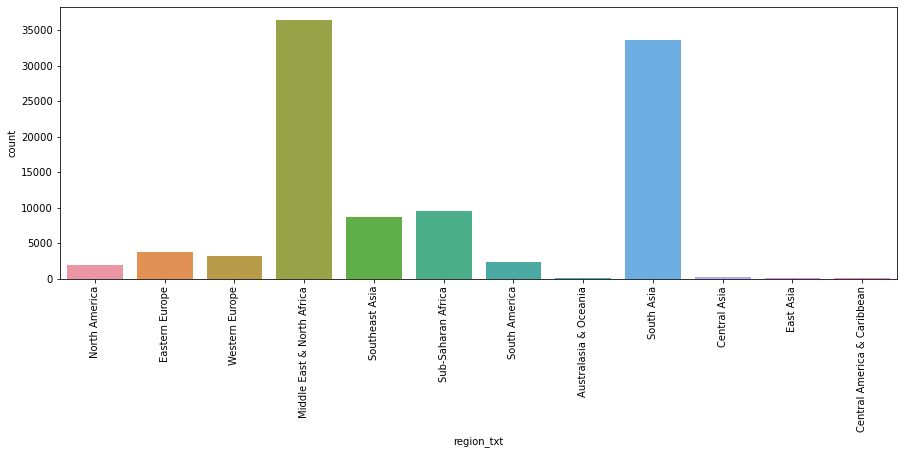

In [38]:

plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.region_txt)
plt.xticks(rotation=90)
plt.show()

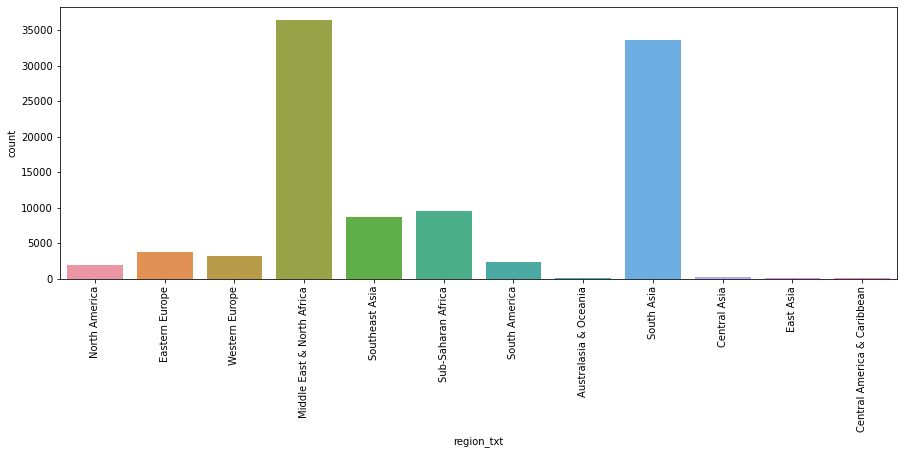

In [39]:

plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.region_txt)
plt.xticks(rotation=90)
plt.show()

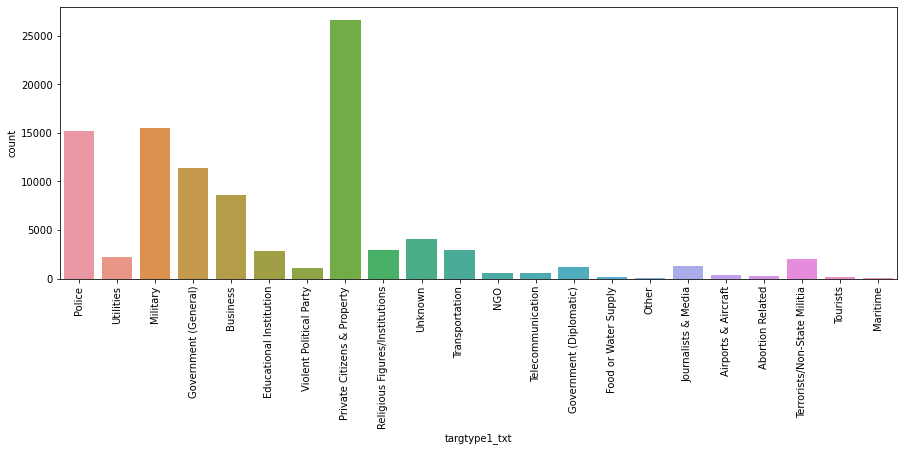

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.targtype1_txt)
plt.xticks(rotation=90)
plt.show()

In [41]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,dbsource
5,1.970010e+11,1970,1,1,0,United States,North America,Illinois,Cairo,37.005105,...,Firearms,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
7,1.970010e+11,1970,1,2,0,United States,North America,California,Oakland,37.791927,...,Explosives,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
8,1.970010e+11,1970,1,2,0,United States,North America,Wisconsin,Madison,43.076592,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
9,1.970010e+11,1970,1,3,0,United States,North America,Wisconsin,Madison,43.072950,...,Incendiary,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
11,1.970010e+11,1970,1,6,0,United States,North America,Colorado,Denver,39.758968,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project


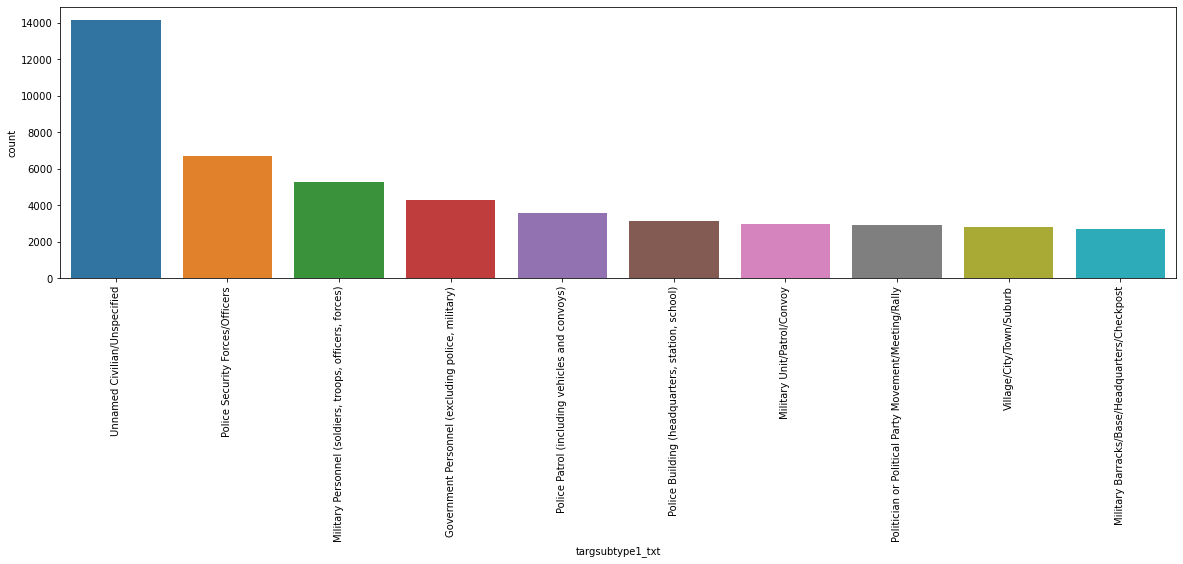

In [42]:
plt.figure(figsize = (20,5))
sns.countplot(x = "targsubtype1_txt", data = terrorist_data, order=pd.value_counts(terrorist_data['targsubtype1_txt']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

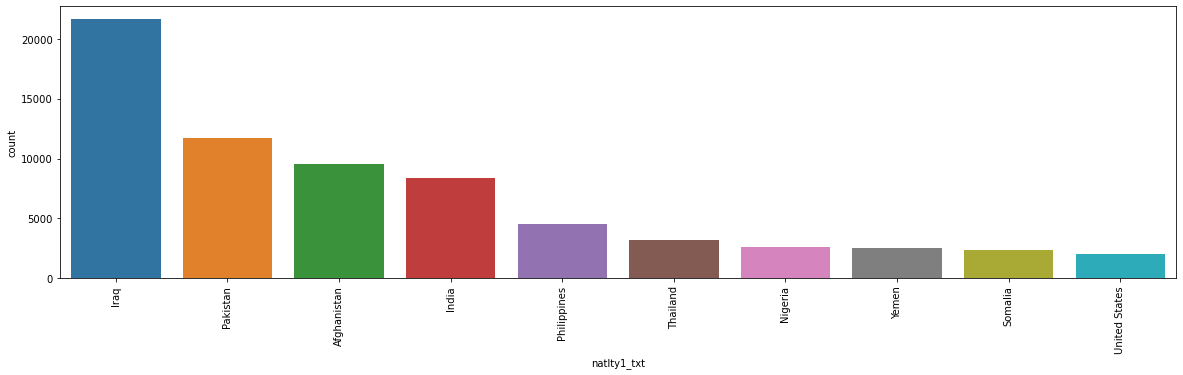

In [43]:

plt.figure(figsize = (20,5))
sns.countplot(x = "natlty1_txt", data = terrorist_data, order=pd.value_counts(terrorist_data['natlty1_txt']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

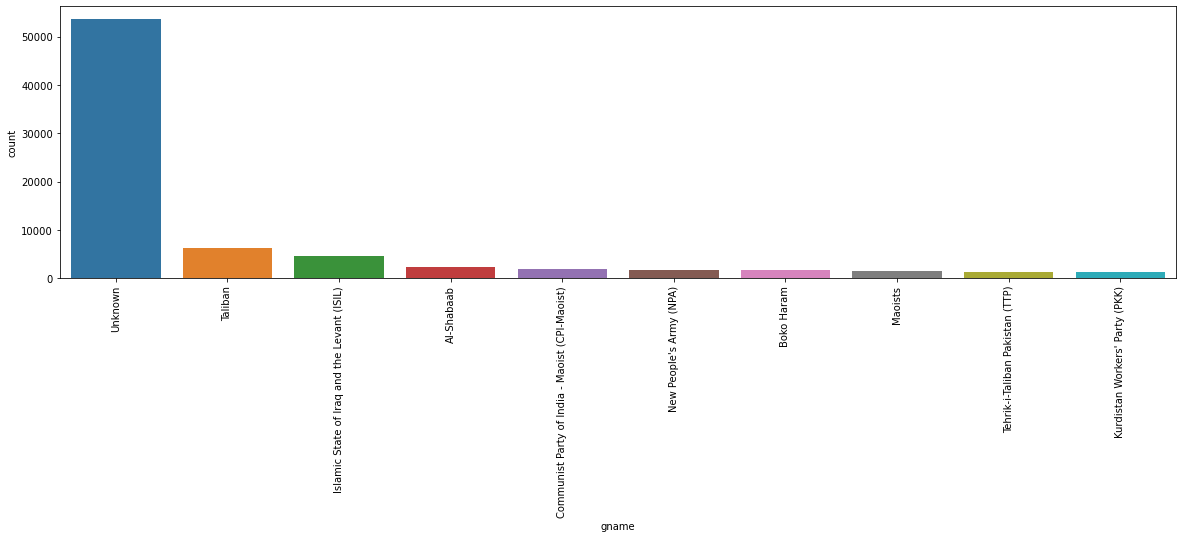

In [44]:

plt.figure(figsize = (20,5))
sns.countplot(x = "gname", data = terrorist_data, order=pd.value_counts(terrorist_data['gname']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

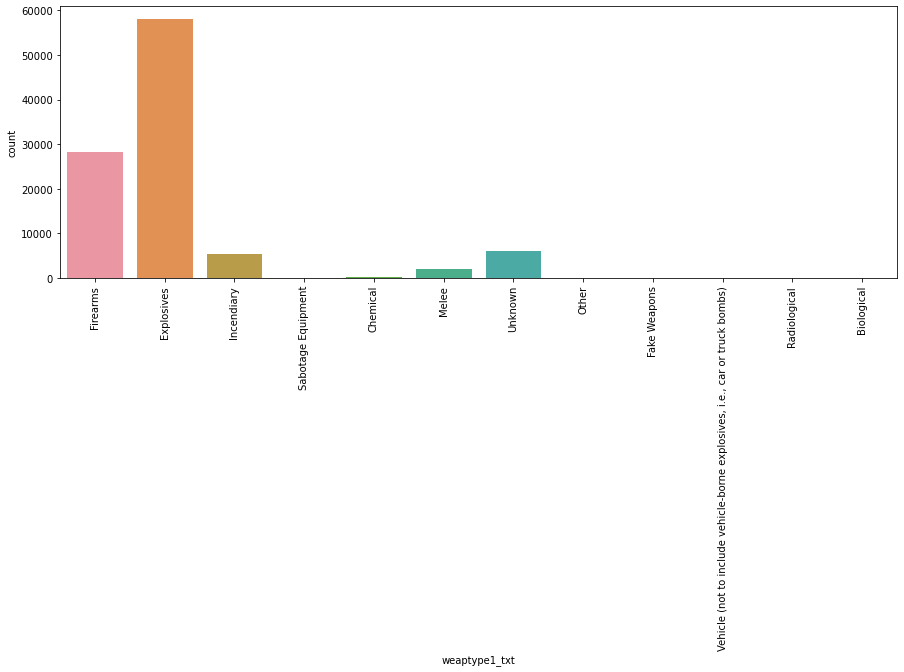

In [45]:
plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.weaptype1_txt)
plt.xticks(rotation=90)
plt.show()


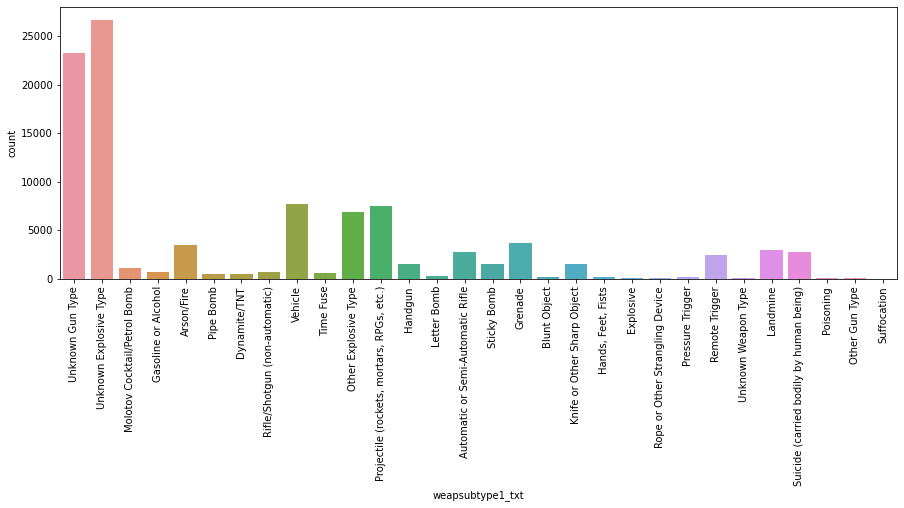

In [46]:

plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.weapsubtype1_txt)
plt.xticks(rotation=90)
plt.show()

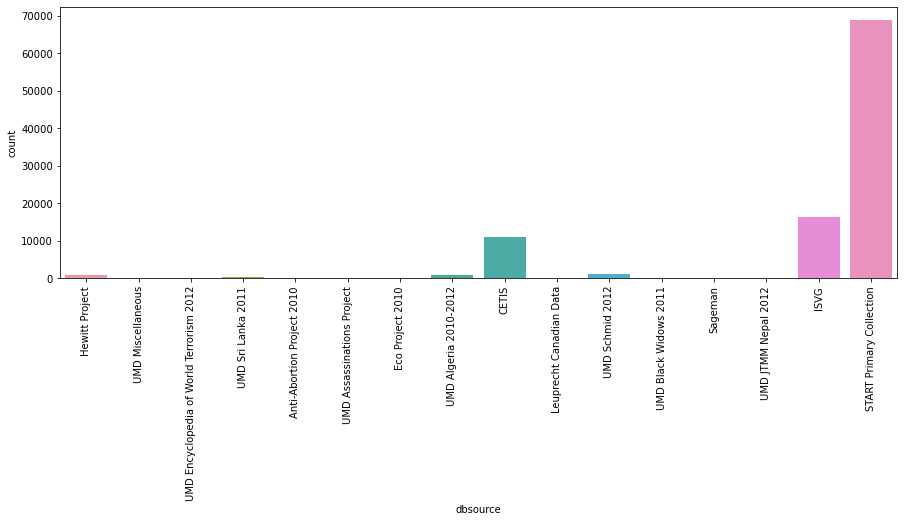

In [47]:
plt.figure(figsize = (15,5))
sns.countplot(x=terrorist_data.dbsource)
plt.xticks(rotation=90)
plt.show()

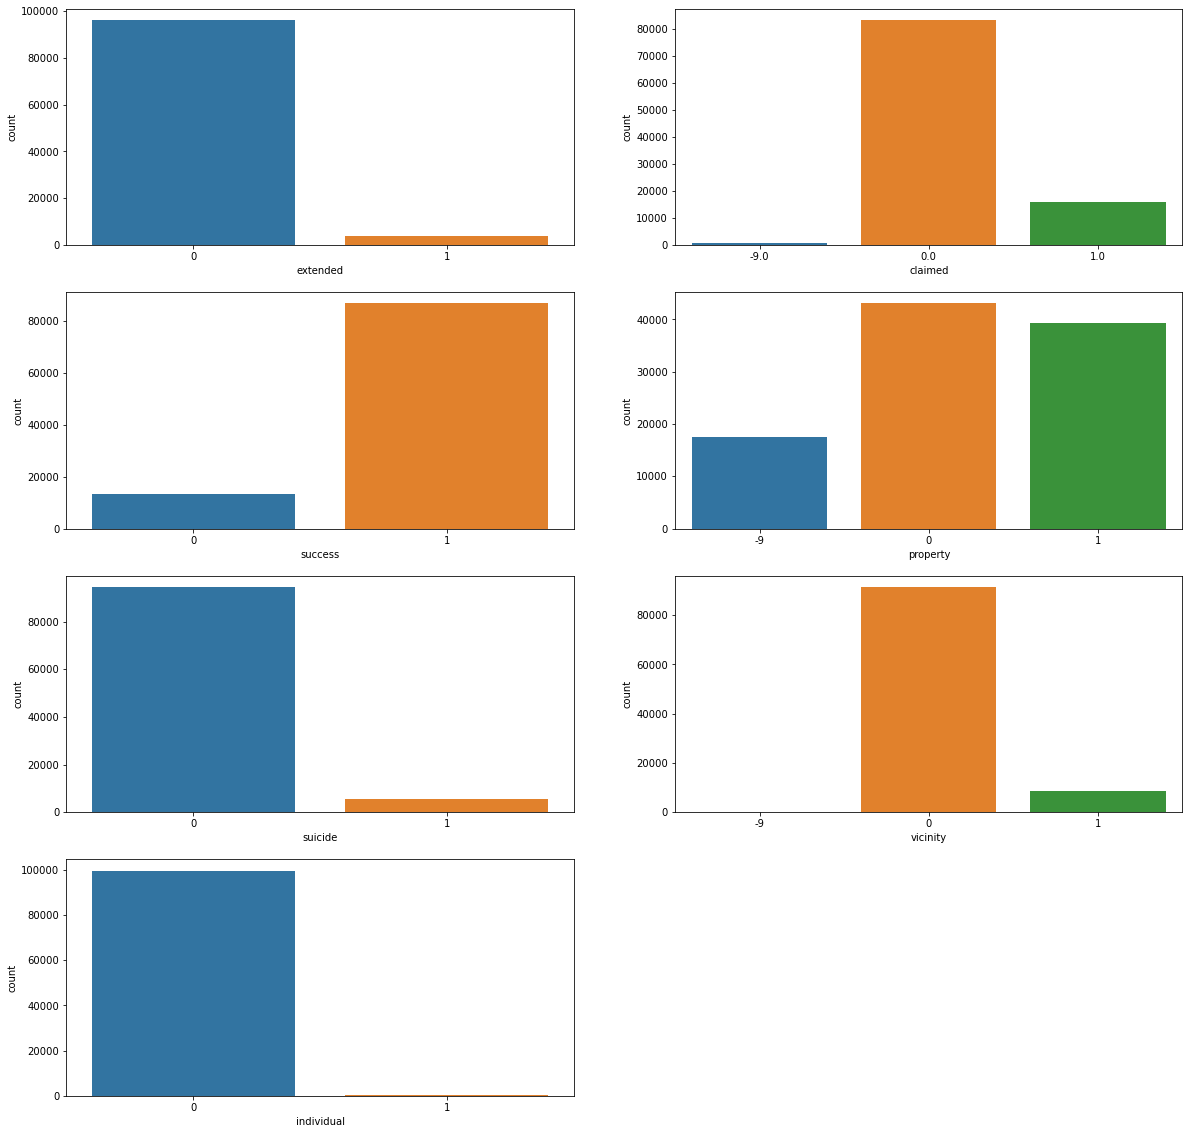

In [48]:
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
sns.countplot(x=terrorist_data.extended)
plt.subplot(4,2,3)
sns.countplot(x=terrorist_data.success)
plt.subplot(4,2,5)
sns.countplot(x=terrorist_data.suicide)
plt.subplot(4,2,7)
sns.countplot(x=terrorist_data.individual)
plt.subplot(4,2,2)
sns.countplot(x=terrorist_data.claimed)
plt.subplot(4,2,4)
sns.countplot(x=terrorist_data.property)
plt.subplot(4,2,6)
sns.countplot(x=terrorist_data.vicinity)
plt.show()


### Bivariant analysis

In [49]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,dbsource
5,1.970010e+11,1970,1,1,0,United States,North America,Illinois,Cairo,37.005105,...,Firearms,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
7,1.970010e+11,1970,1,2,0,United States,North America,California,Oakland,37.791927,...,Explosives,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
8,1.970010e+11,1970,1,2,0,United States,North America,Wisconsin,Madison,43.076592,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
9,1.970010e+11,1970,1,3,0,United States,North America,Wisconsin,Madison,43.072950,...,Incendiary,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project
11,1.970010e+11,1970,1,6,0,United States,North America,Colorado,Denver,39.758968,...,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project


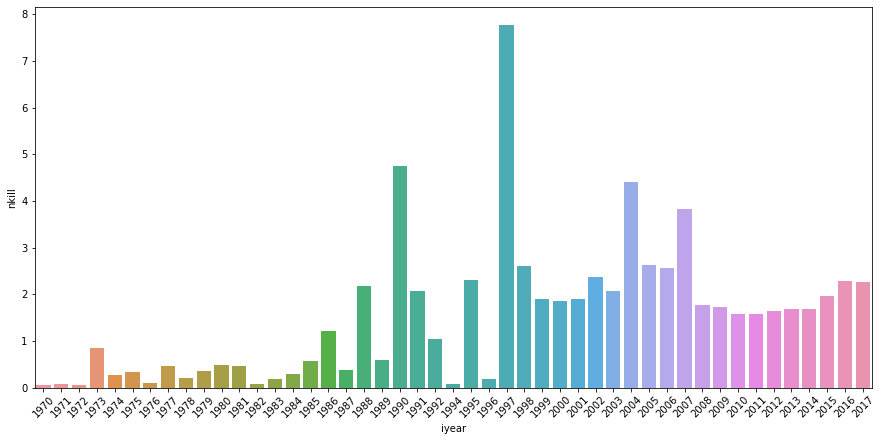

In [50]:

plt.figure(figsize=(15,7))
sns.barplot(x = terrorist_data.iyear, y = terrorist_data.nkill, ci=None)
plt.xticks(rotation=45)
plt.show()


From abive plot we can see that they are more deaths or kills in the year 1997 compared to other years and there is a significant rate of deaths after 1997.


As we saw in month and days columns we have "0" values in them which in practical will not make any sense lets remove them.


### Now lets check for month.

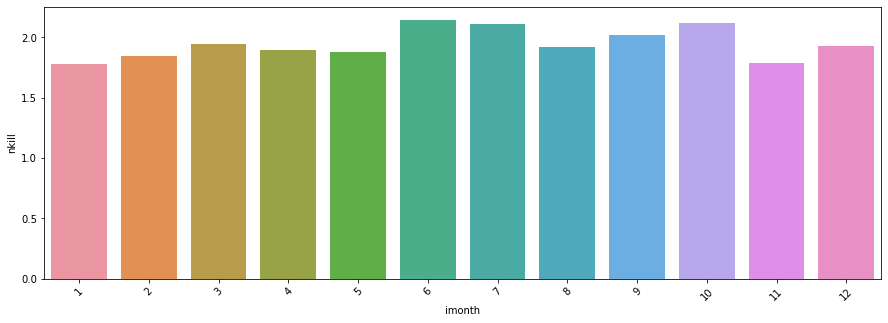

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(x = terrorist_data.imonth, y = terrorist_data.nkill, ci=None)
plt.xticks(rotation=45)
plt.show()

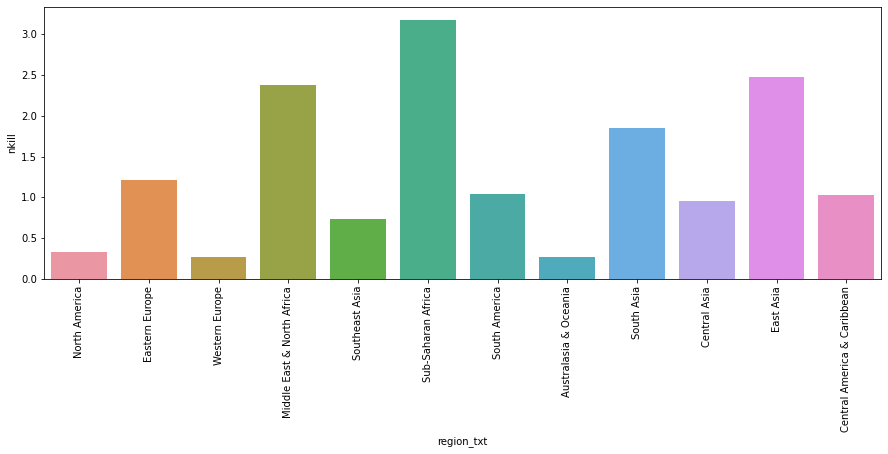

In [54]:
plt.figure(figsize = (15,5))
sns.barplot(x=terrorist_data.region_txt, y = terrorist_data.nkill, ci=None)
plt.xticks(rotation=90)
plt.show()


**The region "Sub- Saharan" have high rate of total deaths. lets check for kills of common and terrosits.**

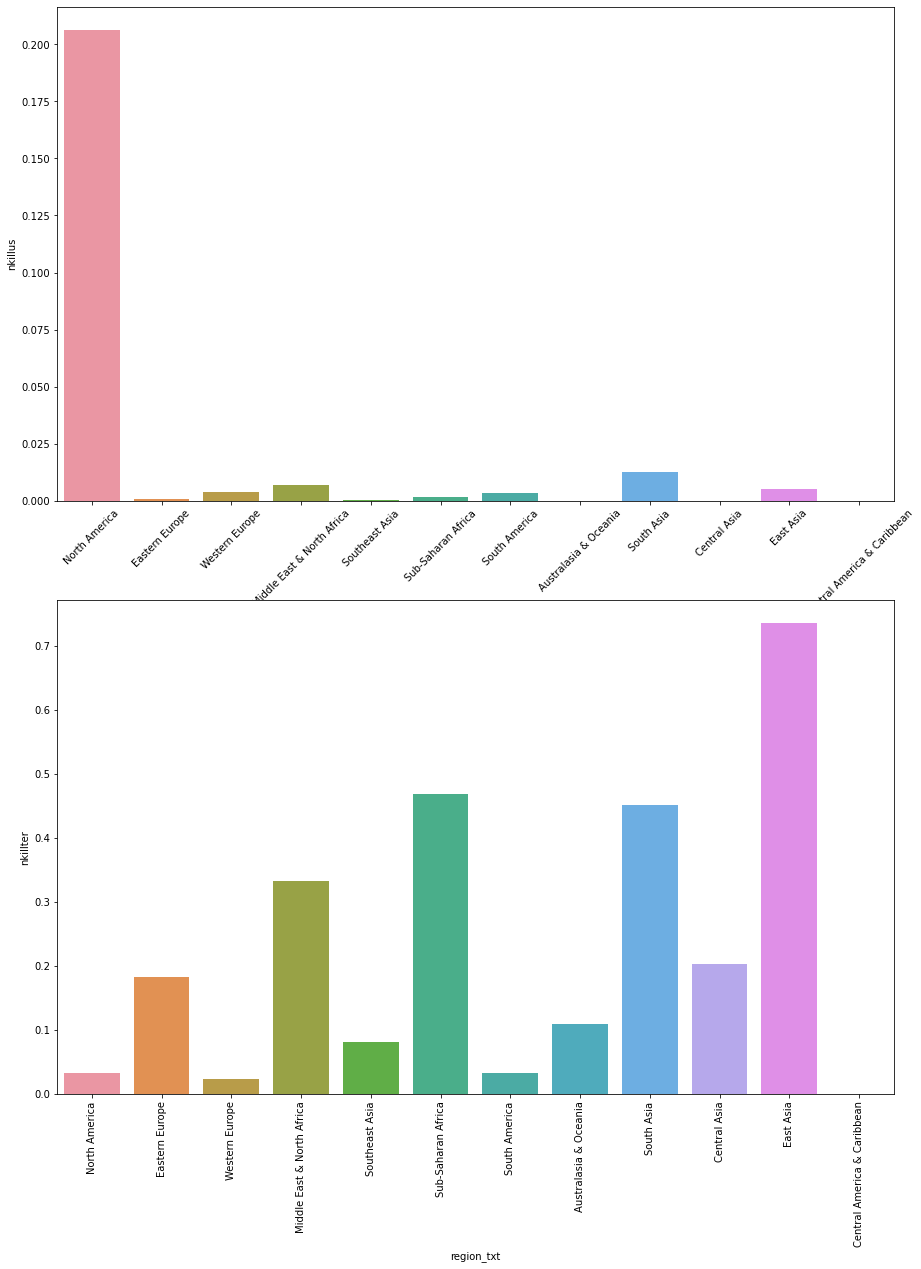

In [55]:
plt.figure(figsize = (15,20))
plt.subplot(2,1,1)
sns.barplot(x=terrorist_data.region_txt, y = terrorist_data.nkillus, ci=None)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x=terrorist_data.region_txt, y = terrorist_data.nkillter, ci=None)
plt.xticks(rotation=90)
plt.show()


**When we check for kills of civilians there is high rate in "North America" When is come to death of terrorists "East asia" have high rate**

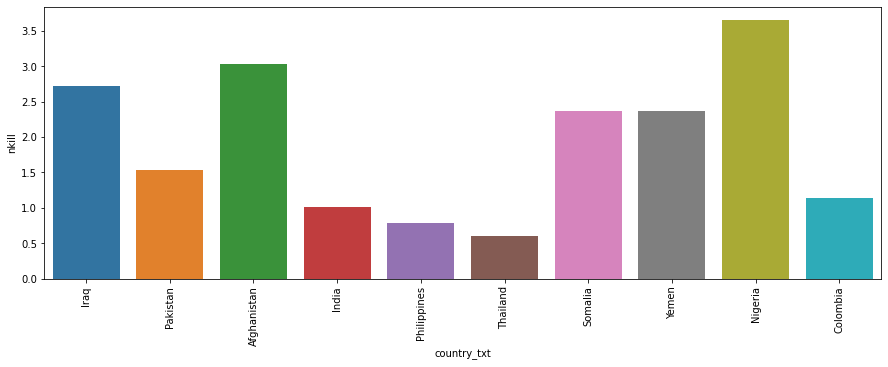

In [56]:
plt.figure(figsize = (15,5))
sns.barplot(x = "country_txt",y = "nkill",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['country_txt']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

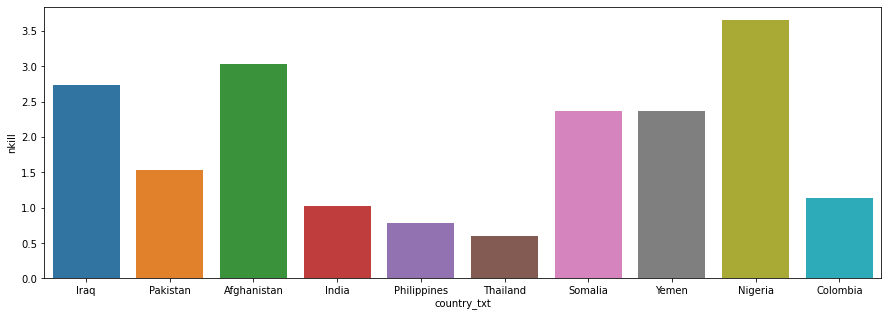

In [57]:

plt.figure(figsize = (15,5))
sns.barplot(x = "country_txt",y = "nkill",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['country_txt']).iloc[:10].index)
plt.show()


**The country "Afghanistan" have high rate of kills on common man and terrosits.**

In [59]:
terrorist_data.head()

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,dbsource,incident_date
5,1.970010e+11,1970,1,1,0,United States,North America,Illinois,Cairo,37.005105,...,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project,1970/1/1
7,1.970010e+11,1970,1,2,0,United States,North America,California,Oakland,37.791927,...,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project,1970/1/2
8,1.970010e+11,1970,1,2,0,United States,North America,Wisconsin,Madison,43.076592,...,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project,1970/1/2
9,1.970010e+11,1970,1,3,0,United States,North America,Wisconsin,Madison,43.072950,...,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project,1970/1/3
11,1.970010e+11,1970,1,6,0,United States,North America,Colorado,Denver,39.758968,...,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,0.0,1,Hewitt Project,1970/1/6


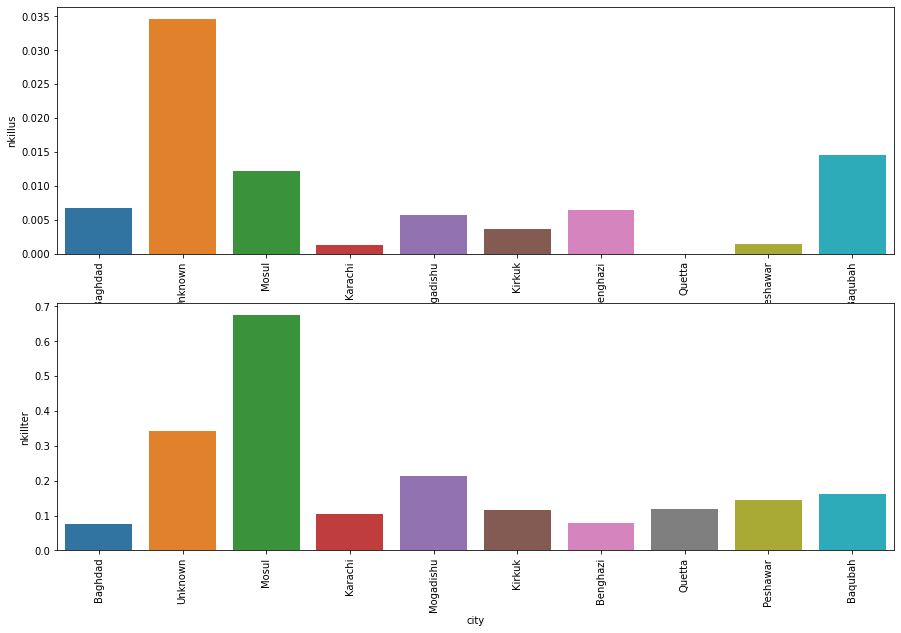

In [60]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.barplot(x = "city",y = "nkillus",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['city']).iloc[:10].index)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x = "city",y = "nkillter",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['city']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()


**Most of the cities which are kills of "nkillus" have by "Shankville" and most of kills by "nkillter" is in "Dhading District".**

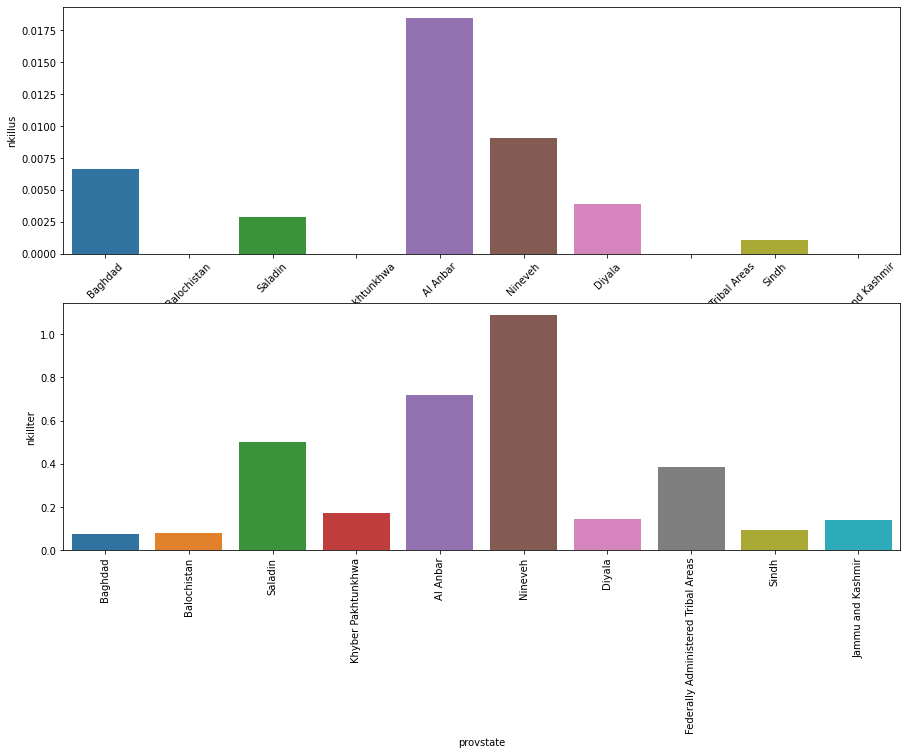

In [62]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.barplot(x = "provstate",y = "nkillus",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['provstate']).iloc[:10].index)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x = "provstate",y = "nkillter",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['provstate']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()


**The provstate "Pennyslavia" have high kills of "nkillus" and "southern Liech" have high of "nkillter"**

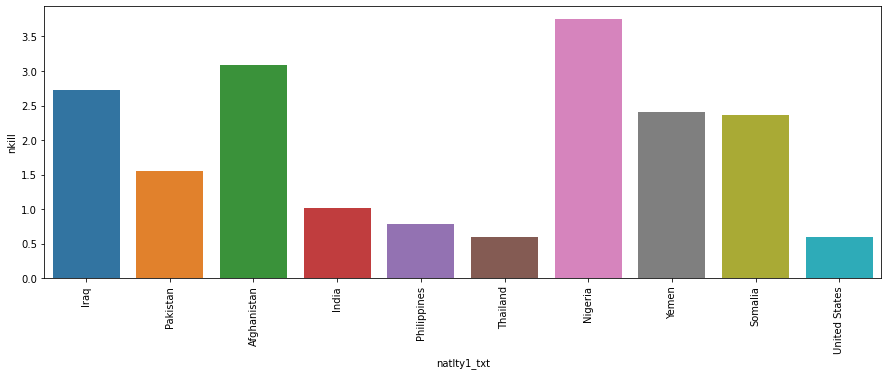

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(x = "natlty1_txt",y = "nkill",ci=None, data = terrorist_data, order=pd.value_counts(terrorist_data['natlty1_txt']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

**South Sudan have more number of kills. followed by malaysia**

**From the above plots we can see that the countries which have high rate of kills and events.**

**The countries which have high incidents and kills are "Iraq", "Afghanisthan", "Nigeria", "Yemen", "Somalia".Lets focus on these countries because of there hot zone.**

In [65]:

total_kills = terrorist_data.groupby(by='country_txt', as_index=False).sum().sort_values(by='nkill', ascending=False).loc[:, ['country_txt', 'nkill']]
total_kills = total_kills.iloc[:5, :]
total_kills

,country_txt,nkill
68,Iraq,59874.0
0,Afghanistan,31424.0
110,Pakistan,18387.0
108,Nigeria,9798.0
65,India,8475.0


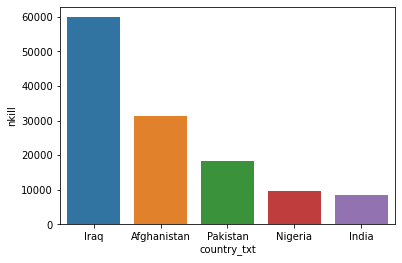

In [66]:
sns.barplot(x = total_kills.country_txt, y = total_kills.nkill)
plt.show()


**Lets focus on above countries .**

### Iraq

In [68]:
iraq = terrorist_data[terrorist_data["country_txt"] == "Iraq"]

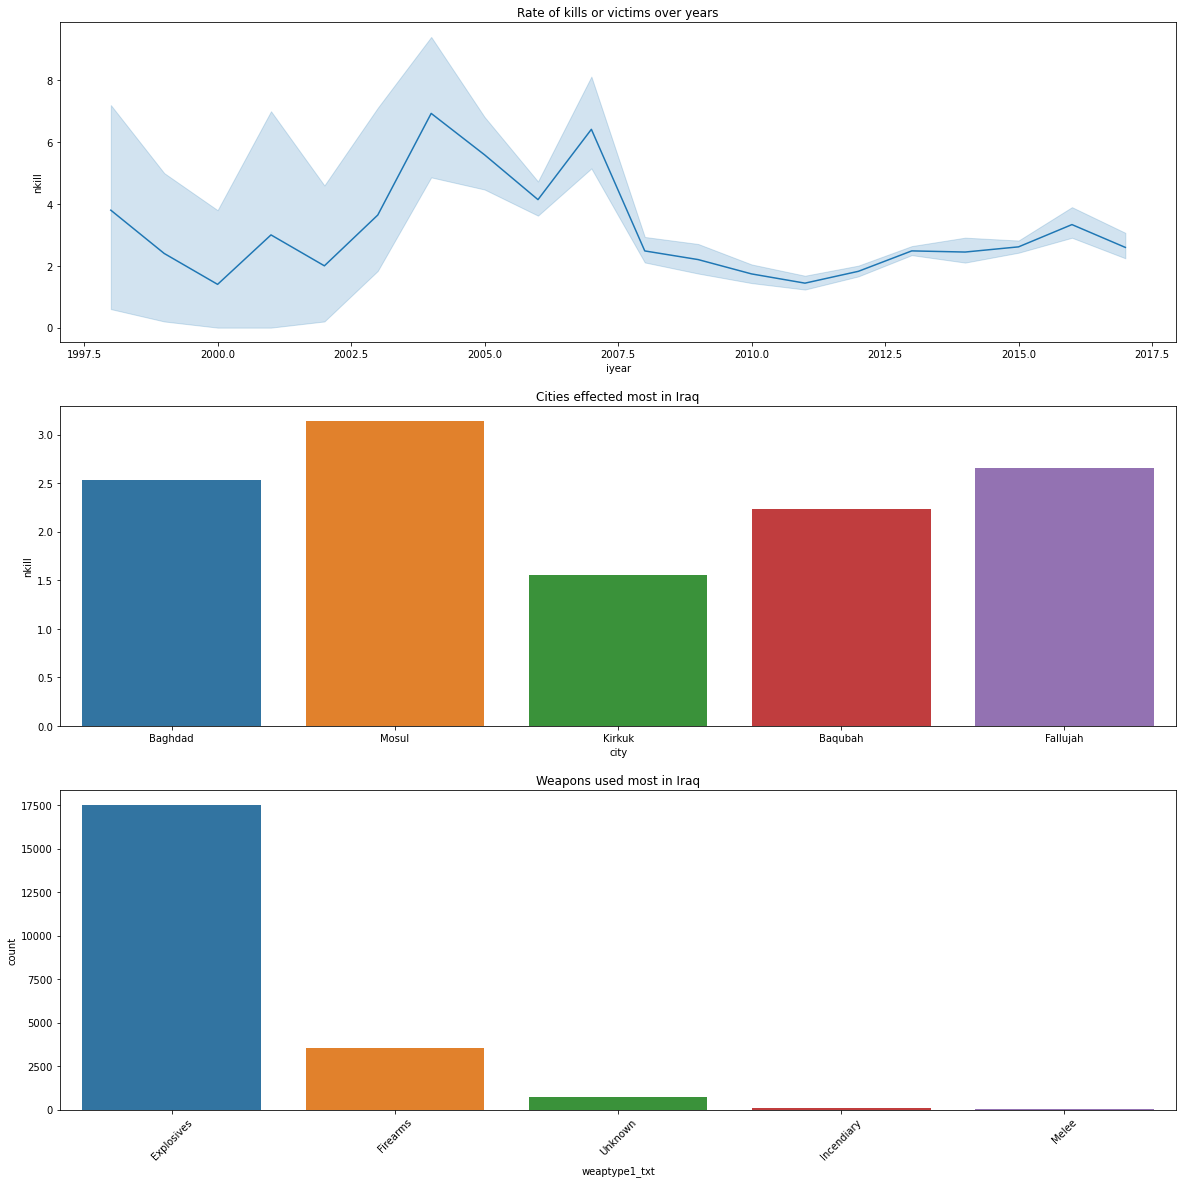

In [69]:

plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.lineplot(x = iraq.iyear, y = iraq.nkill)
plt.title("Rate of kills or victims over years")
plt.subplot(3,1,2)
sns.barplot(x = "city", y = "nkill", data = iraq, order = pd.value_counts(iraq['city']).iloc[:5].index, ci=None)
plt.title("Cities effected most in Iraq")
plt.subplot(3,1,3)
sns.countplot(x = iraq.weaptype1_txt, order = pd.value_counts(iraq['weaptype1_txt']).iloc[:5].index)
plt.title("Weapons used most in Iraq")
plt.xticks(rotation=45)
plt.show()

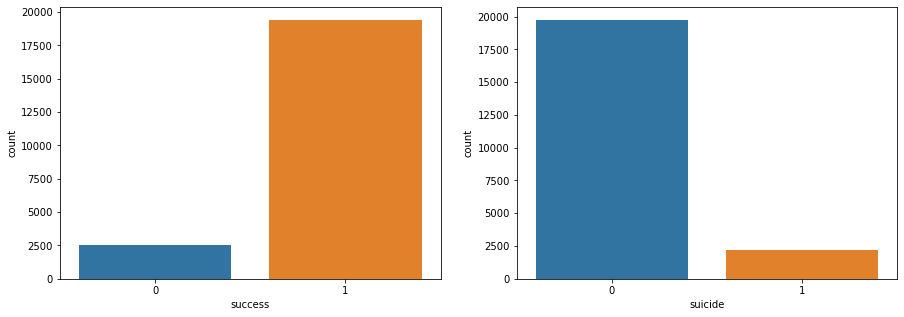

In [70]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x =iraq.success)
plt.subplot(1,2,2)
sns.countplot(x =iraq.suicide)
plt.show()

**Insights**
* In the period between 2002 - 2007 there are more incidents of terrorism have happend as you can see a gradual increase and decrease in the line.

* The cities which have been effected mostly are "Mosul", "Baghdad", "Fallujah", "Baqubah", "Kirkuk".

* The have mostly used "Explosives", and "Firearms" to attack.

* The success rate is high and sucide is low.

### Afghanisthan


In [71]:
afghanistan = terrorist_data[terrorist_data["country_txt"] == "Afghanistan"]

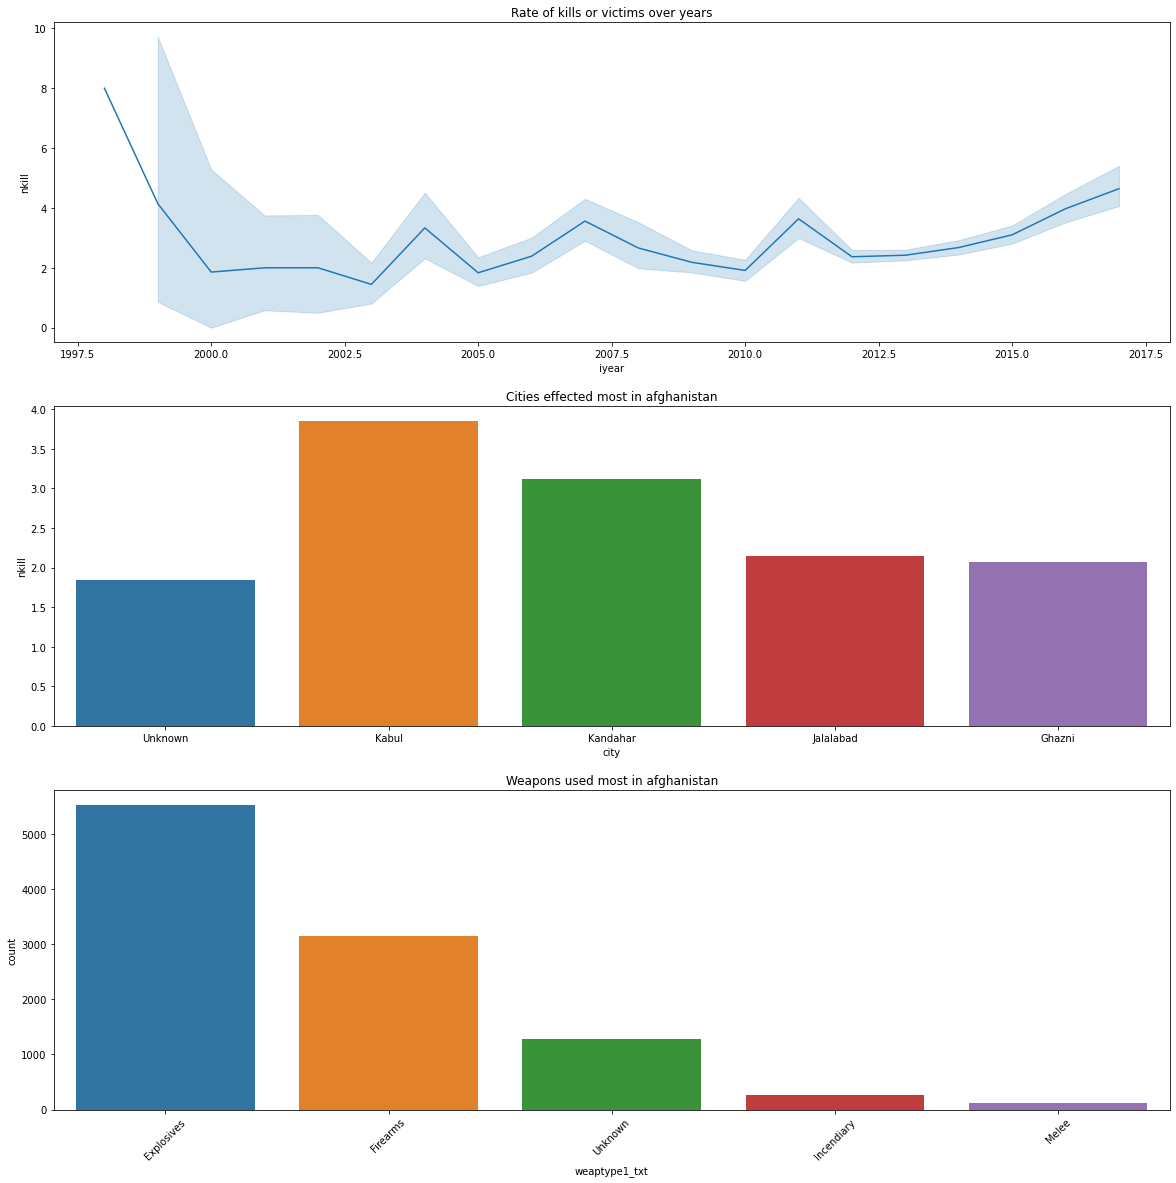

In [72]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.lineplot(x = afghanistan.iyear, y = afghanistan.nkill)
plt.title("Rate of kills or victims over years")
plt.subplot(3,1,2)
sns.barplot(x = "city", y = "nkill", data = afghanistan, order = pd.value_counts(afghanistan['city']).iloc[:5].index, ci=None)
plt.title("Cities effected most in afghanistan")
plt.subplot(3,1,3)
sns.countplot(x = afghanistan.weaptype1_txt, order = pd.value_counts(afghanistan['weaptype1_txt']).iloc[:5].index)
plt.title("Weapons used most in afghanistan")
plt.xticks(rotation=45)
plt.show()

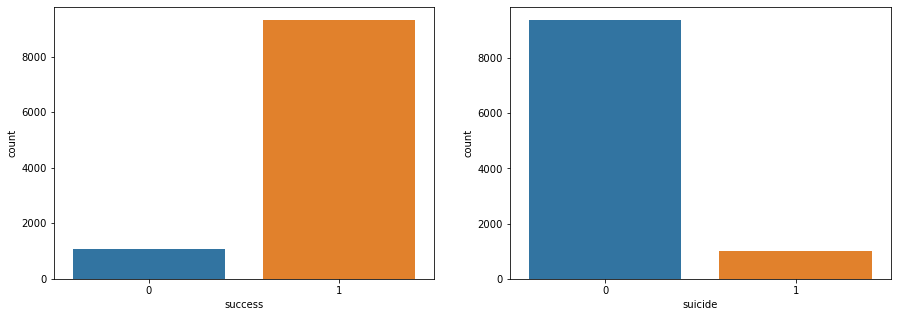

In [73]:

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x =afghanistan.success)
plt.subplot(1,2,2)
sns.countplot(x =afghanistan.suicide)
plt.show()


**Insights**
* In afghanistan the rate of attacks have been decreased gradually since 1998 and had a significant increase after 2012.

* Mostly "Kabul", "Kandahar", "Jalalabad", "Ghazni" are effected mostly and few of the places names are unknown.

* In this case also the have used "Explosives", and "Firearms".


### Pakisthan

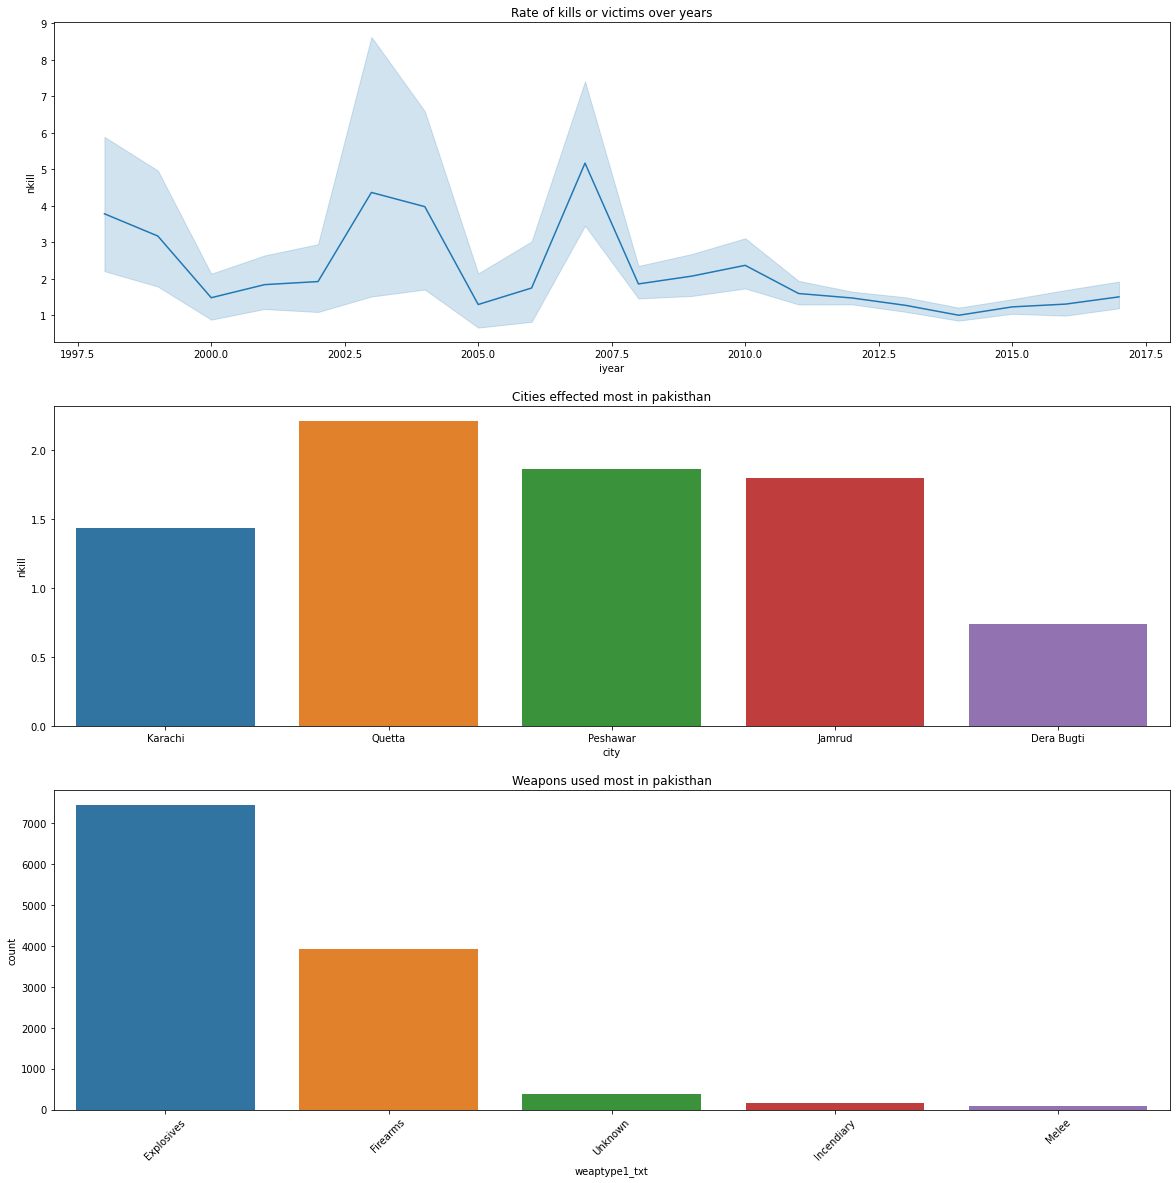

In [75]:
pakisthan = terrorist_data[terrorist_data["country_txt"] == "Pakistan"]
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.lineplot(x = pakisthan.iyear, y = pakisthan.nkill)
plt.title("Rate of kills or victims over years")
plt.subplot(3,1,2)
sns.barplot(x = "city", y = "nkill", data = pakisthan, order = pd.value_counts(pakisthan['city']).iloc[:5].index, ci=None)
plt.title("Cities effected most in pakisthan")
plt.subplot(3,1,3)
sns.countplot(x = pakisthan.weaptype1_txt, order = pd.value_counts(pakisthan['weaptype1_txt']).iloc[:5].index)
plt.title("Weapons used most in pakisthan")
plt.xticks(rotation=45)
plt.show()

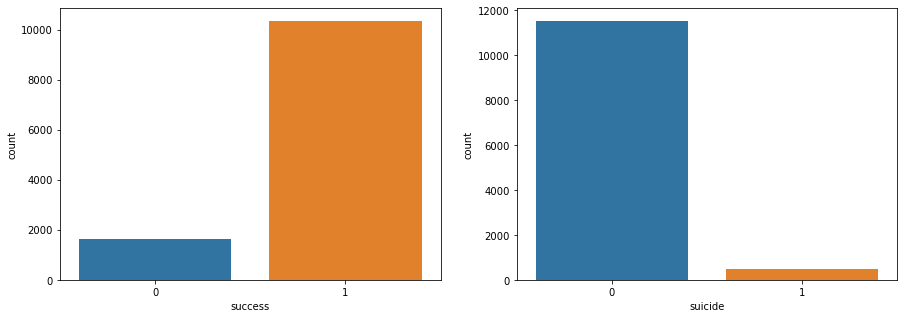

In [76]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x =pakisthan.success)
plt.subplot(1,2,2)
sns.countplot(x =pakisthan.suicide)
plt.show()


### Nigeria

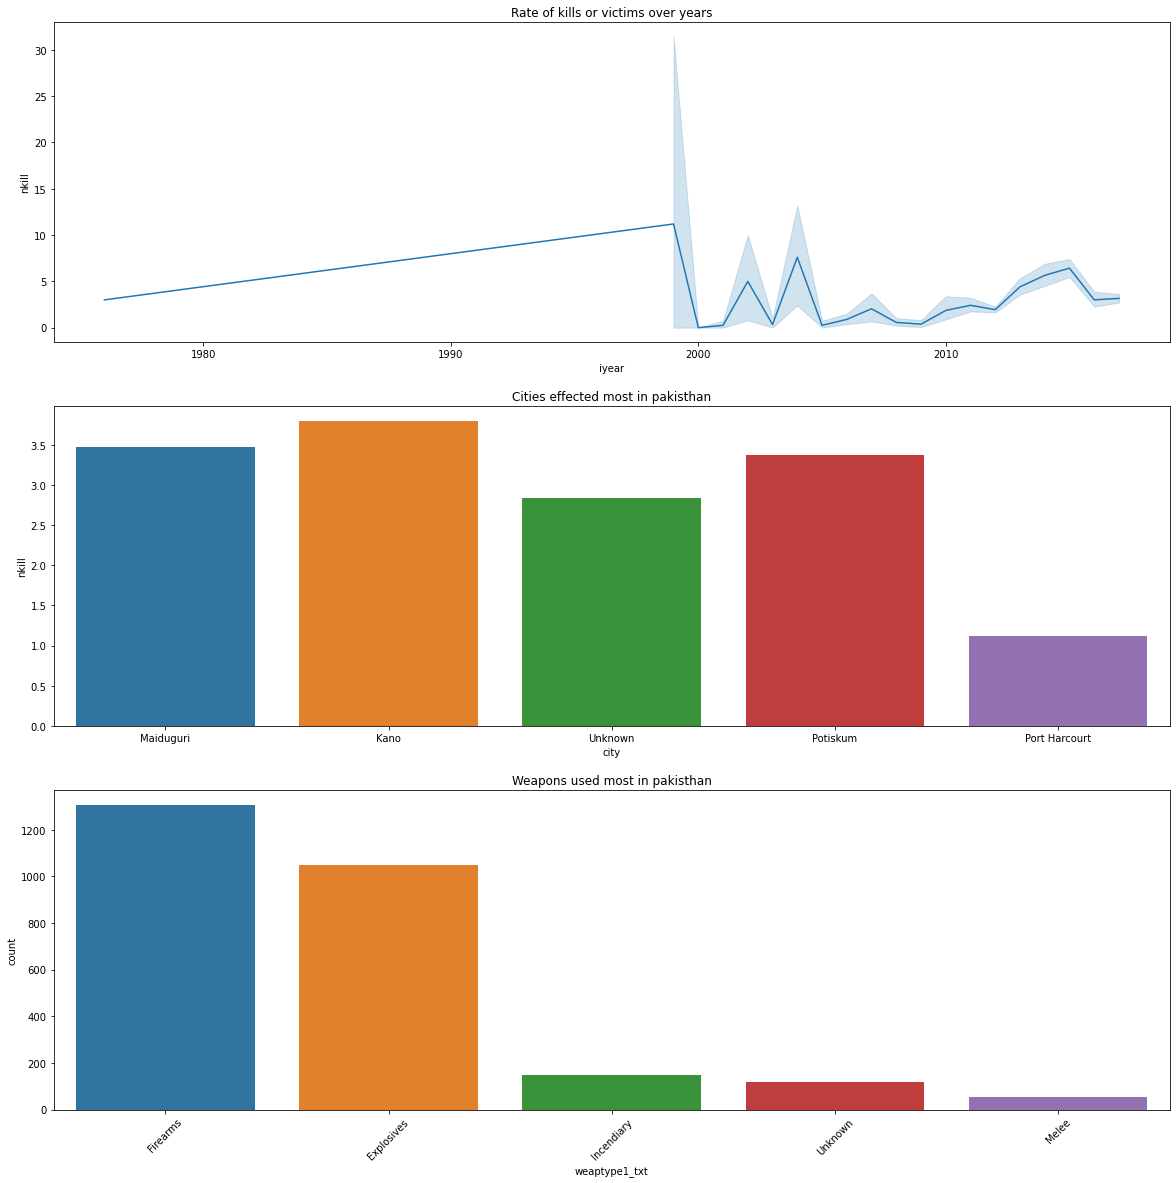

In [77]:
nigeria = terrorist_data[terrorist_data["country_txt"] == "Nigeria"]
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.lineplot(x = nigeria.iyear, y = nigeria.nkill)
plt.title("Rate of kills or victims over years")
plt.subplot(3,1,2)
sns.barplot(x = "city", y = "nkill", data = nigeria, order = pd.value_counts(nigeria['city']).iloc[:5].index, ci=None)
plt.title("Cities effected most in pakisthan")
plt.subplot(3,1,3)
sns.countplot(x = nigeria.weaptype1_txt, order = pd.value_counts(nigeria['weaptype1_txt']).iloc[:5].index)
plt.title("Weapons used most in pakisthan")
plt.xticks(rotation=45)
plt.show()

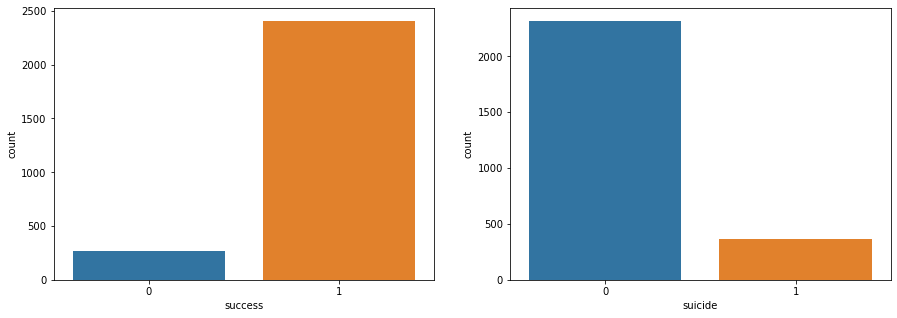

In [78]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x =nigeria.success)
plt.subplot(1,2,2)
sns.countplot(x =nigeria.suicide)
plt.show()


### India

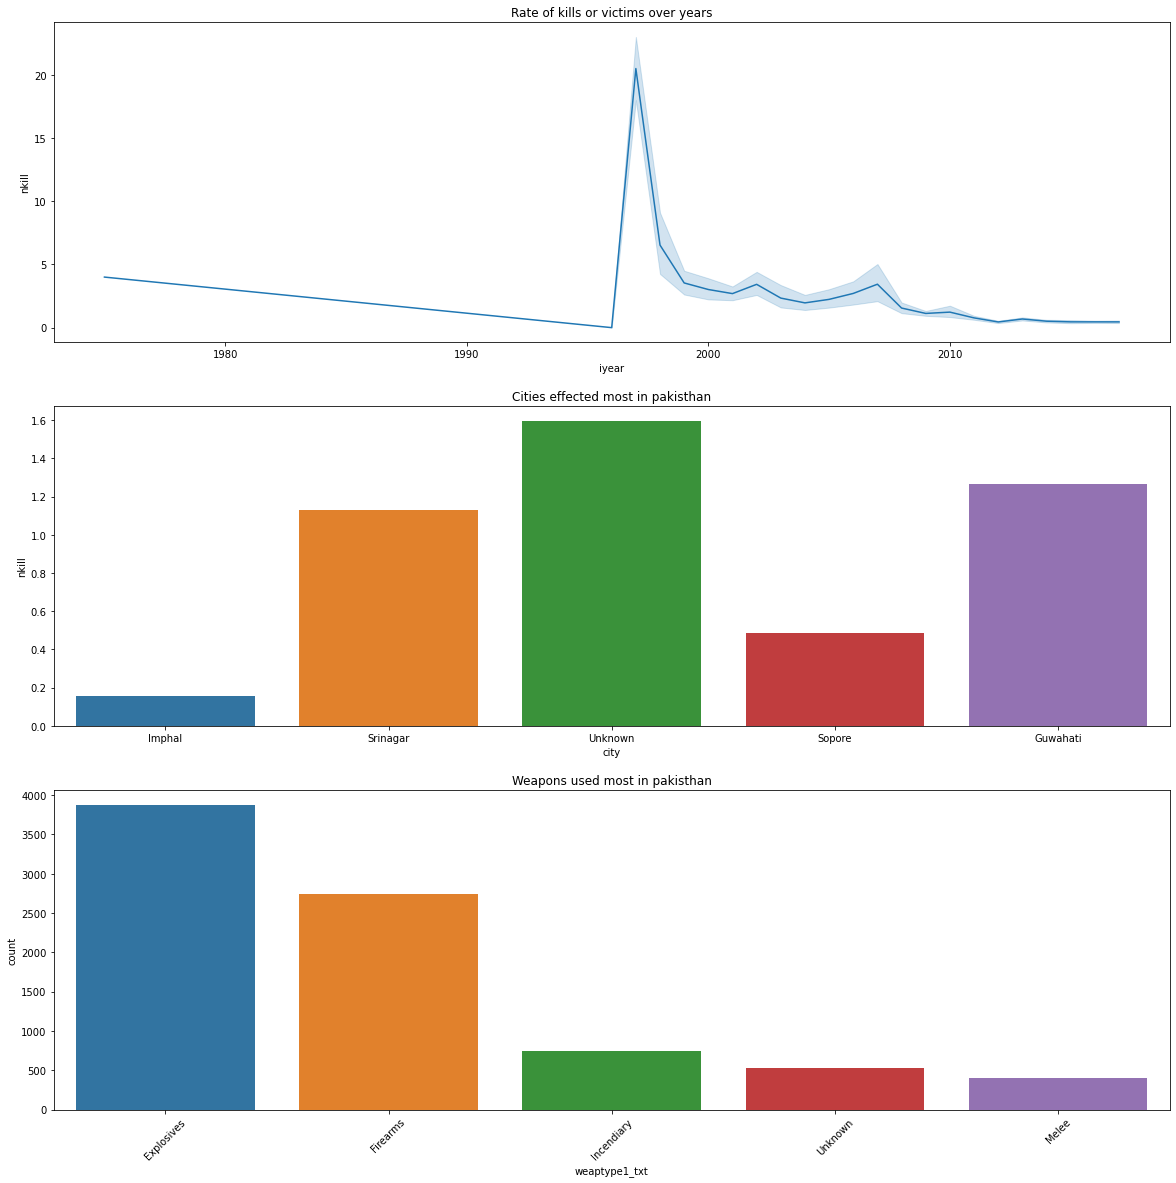

In [79]:
india = terrorist_data[terrorist_data["country_txt"] == "India"]
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.lineplot(x = india.iyear, y = india.nkill)
plt.title("Rate of kills or victims over years")
plt.subplot(3,1,2)
sns.barplot(x = "city", y = "nkill", data = india, order = pd.value_counts(india['city']).iloc[:5].index, ci=None)
plt.title("Cities effected most in pakisthan")
plt.subplot(3,1,3)
sns.countplot(x = india.weaptype1_txt, order = pd.value_counts(india['weaptype1_txt']).iloc[:5].index)
plt.title("Weapons used most in pakisthan")
plt.xticks(rotation=45)
plt.show()


**EDA analysis insights:**

**Top five countries to be focus as hot zone:**
* Iraq
* Afghanistan
* Pakisthan
* Nigeria
* India
      
**Top Regions to be focused:**
* Middle East and South Africa
* South Asia
      
**Mostly Used Weapons:**
* Explosives
*  Firearms
      
**Highest kills rate:**
* Iraq 
* Afghanisthan